# Read libraries

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from colorama import Back, Fore, Style
from copy import copy, deepcopy
from pathlib import Path
from sys import path


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

from matplotlib.gridspec import GridSpec

In [3]:
def half_frame(sub, xaxis_label, yaxis_label, font_size = 15, padding = -0.02):
    """Formats frame, axes, and ticks for matplotlib made graphic 
       with half frame.
       
    """

    # Format graph frame and tick marks
    sub.yaxis.set_ticks_position('left')
    sub.xaxis.set_ticks_position('bottom')
    sub.tick_params(axis = 'both', which = 'major', length = 7, width = 1.5, 
                    direction = 'out', pad = 10, labelsize = font_size)
    sub.tick_params(axis = 'both', which = 'minor', length = 5, width = 1.5, 
                    direction = 'out', labelsize = 10)
    for axis in ['bottom','left']:
        sub.spines[axis].set_linewidth(1.5)
        sub.spines[axis].set_position(("axes", padding))
    for axis in ['top','right']:
        sub.spines[axis].set_visible(False)

    # Format axes
    sub.set_xlabel(xaxis_label, fontsize = 1.6 * font_size)
    sub.set_ylabel(yaxis_label, fontsize = 1.6 * font_size)


In [4]:
my_fontsize = 15

# Read Reese's data

In [5]:
df = pd.read_csv("openalex_summary_by_year_230502.csv")
df

,year,total_works,n_scopus,n_wos,n_medline,n_wos_after_deindex,n_scopus_after_deindex,n_medline_after_deindex,n_scopus_deindex,n_wos_deindex,...,n_retracted_journals,n_paper_mill,n_paper_mill_journals,n_paper_mill_retracted,n_wos_paper_mill_journals,n_paper_mill_wos,n_scopus_paper_mill_journals,n_paper_mill_scopus,n_medline_paper_mill_journals,n_paper_mill_medline
0,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,17,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,27,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,29,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,195,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,2122,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
405,2200,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
406,2202,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
407,2203,20,20,20,20,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data = df[(df.year >= 2000) & (df.year < 2023)]
data

,year,total_works,n_scopus,n_wos,n_medline,n_wos_after_deindex,n_scopus_after_deindex,n_medline_after_deindex,n_scopus_deindex,n_wos_deindex,...,n_retracted_journals,n_paper_mill,n_paper_mill_journals,n_paper_mill_retracted,n_wos_paper_mill_journals,n_paper_mill_wos,n_scopus_paper_mill_journals,n_paper_mill_scopus,n_medline_paper_mill_journals,n_paper_mill_medline
334,2000,1962112,1448725,1290331,765835,57520,0,35078,5085,152354,...,42,0,0,0,0,0,0,0,0,0
335,2001,2002229,1480363,1311016,772093,62269,0,35701,6033,150640,...,60,0,0,0,0,0,0,0,0,0
336,2002,2156060,1534204,1349018,794252,63299,0,37462,6616,148029,...,77,1,1,0,0,0,0,0,0,0
337,2003,2313596,1622129,1426347,838209,66575,0,38130,6997,155563,...,89,0,0,0,0,0,0,0,0,0
338,2004,2562377,1769133,1545884,913811,71428,0,37396,8691,160224,...,144,1,1,1,0,0,1,1,0,0
339,2005,2762667,1837671,1606662,946812,82536,0,38460,10921,171821,...,183,2,2,0,2,2,2,2,0,0
340,2006,3044016,1990829,1733498,1014643,88025,0,45550,14207,183398,...,269,4,3,1,3,4,3,4,2,2
341,2007,3207392,2055628,1794600,1028858,94576,0,49118,16484,177832,...,280,6,6,1,6,6,6,6,3,3
342,2008,3419177,2161373,1887977,1085698,91917,0,47741,19695,171010,...,323,10,9,0,5,5,5,5,3,3
343,2009,3702942,2325594,2020568,1172718,129403,0,87807,24453,208098,...,374,30,13,19,5,5,5,5,2,2


In [7]:
data_paper_mill_journals = list( data.n_paper_mill_journals )
data_paper_mill_papers = list( data.n_paper_mill )

data_paper_mill_journals

[0,
 0,
 1,
 0,
 1,
 2,
 3,
 6,
 9,
 13,
 18,
 23,
 27,
 45,
 90,
 125,
 173,
 253,
 346,
 475,
 648,
 961,
 557]

# Model definition

We build a simple model in which fraudulent science is published in hijacked or infiltrated journals through the work of bad-actor editors with the ability to accept for publication large numbers of submissions. Prompted by the empirical observations reported in fig. 2, we assume that such hijacking or infiltration events follow a stereotypical spike-like form with a duration of 7 or fewer years (fig. S7).

We make two additional assumptions. First, the number of hijacked or infiltrated journals increases with a constant average growth rate, $r_n$. Second, a fraudulent publication is detected with a probability p(t) that converges exponentially to an average value, $p_d$:

> $p(t) = p_d \left( 1 - {\rm exp} \left( -\frac{t - 2000}{\tau} \right) \right)$.

This second assumption is consistent with empirical observations (fig. S8).

Both assumptions can be implemented in a deterministic or stochastic manner. We first consider
the deterministic case. In this case, the number of newly infiltrated journals is

> $n(t+1) = {\rm int}\left[ 1 +  r_n ~ n(t)\right]$;


the number of detected fraudulent for a given infected journal is

> $d(t+1) = {\rm int}\left[ p(t+1) ~v(t+1 - t_j^c) + 0.5 \right]$,

where $j$ is an index running over infiltrated journals, $t_j^c$ is the year when journal $j$ was infiltrated, 
and $v(u)$ is the volume of fraudulent publications at age $u$; and the number of detected 
infiltrated journals is the number of journals for which $d > 0$.

We define the total fitting error as

> $E = E_j + 0.1~E_p$,

where $E_j$ is the sum of the absolute difference of the logs of the predicted number of detected
journals and the observed number of detected journals publishing paper mill articles between 2004 and 2004 inclusive, and $E_p$ is the sum of the absolute difference of the logs of the predicted number of detected paper mill papers and the observed number of detected suspected paper mill papers between 2004 and 2004 inclusive. We give less weight to the latter term because we expect it to be less reliable.


Below, we set $\tau = 4$ and scan parameter space for $r_n$ and $p_d$.


## Publication peak in infiltrated or hijacked journals

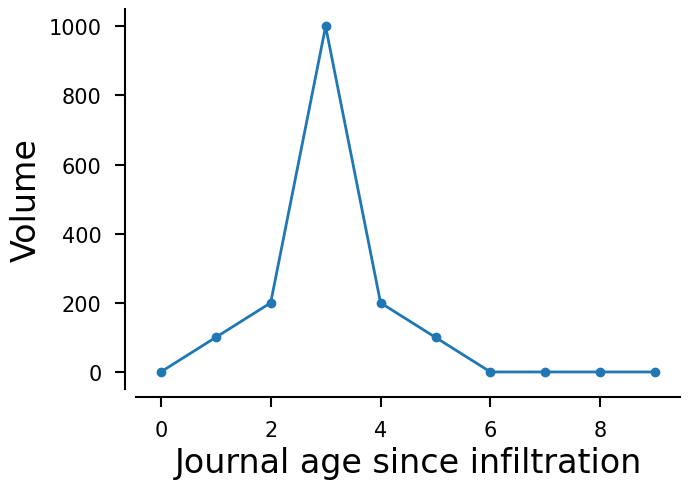

In [8]:
publication_tent = [0, 100, 200, 1000, 200, 100, 0, 0, 0, 0]
years = range(0, 10)

fig = plt.figure( figsize = (7,5) )
ax = fig.add_subplot(111)

half_frame(ax, 'Journal age since infiltration', 'Volume', font_size = my_fontsize )
ax.plot(years, publication_tent, 'o-', lw = 2);
# ax.set_xlim(2000, 2020)
# ax.set_ylim(0, 1000)

plt.tight_layout()
plt.savefig('./publication_spike.png')

## Releasing the constraint of fixed publication peak size

In many of the simulations considered below, the number of paper mill products published in infiltrated journals at the peak is constant at a value of 1,000.

This is clearly an unrealistic approximation. Considering the range of value in the observed cases of delisted journals, a much more likely case is one where there is a log-normal distribution of sizes at peak with a median value of a few thousand papers.  In our final modeling, we assume that the distribution of the number of papers published at the peak is a log-normal with a median of 5,000 and a standard deviation of 1.

This distribution is shown in the figure below.

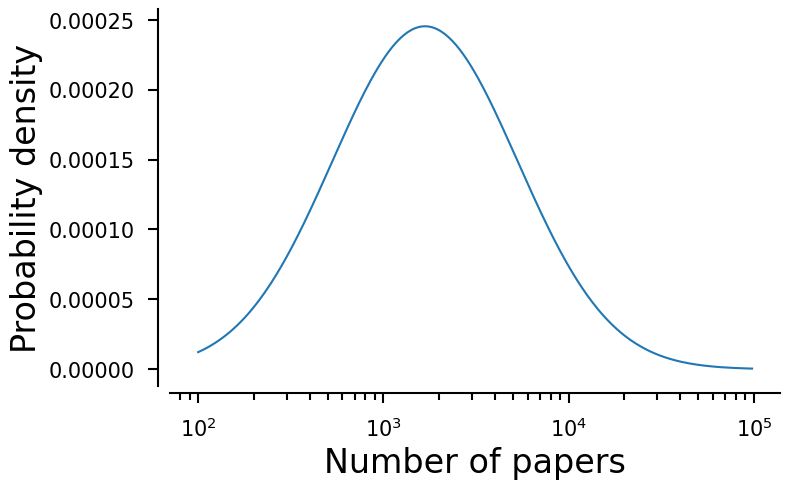

In [47]:
fig = plt.figure( figsize = (8,5) )
ax = []

rv = stats.norm(3.8, 0.5)
x = np.arange(2, 5, 0.01)

# Journals
#
ax.append( fig.add_subplot(111) )
half_frame(ax[-1], 'Number of papers', 'Probability density', font_size = my_fontsize )

# ax[-1].set_xticks(range(0,25,4))
# ax[-1].set_xticklabels(range(2000,2025,4)) 
# ax[0].set_ylim(0, 0.8)

ax[0].semilogx(10**x, rv.pdf(x)/10**x)

plt.tight_layout()
plt.savefig("./journal_output_distribution.png")

## Functions for running model

In [10]:
############################################################################
def set_gains( variable_gain, n, gain_function = stats.norm, 
               parameters = {'loc': 3.8, 'scale': 0.5} ):
    """
    Generates a list of factors that multiply peak level for captured 
    journals.
    
    inputs:
        variable_gain:    bool False if no fluctutions
        n:                int with number of gains to be created
        gain_function     default is scipy.stats.norm
        parameters        list of  parameter values for gain_function
        
    returns:
        gains:            list of floats
    """
    if variable_gain:
        gains = list(gain_function.rvs(**parameters, size = n))
    else:
        gains = [1.] * n
        
    
    return gains


############################################################################
def set_detection_rate( variable_detection_rate, rate ):
    """
    Generates a detection rate for a given journal and year
    
    inputs:
        variable_detection_rate:    bool False if no fluctutions
        rate:                       float median detection rate
        
    returns:
        dr:                         float
    """
    if variable_detection_rate:
        detection_rate = np.exp( list(stats.norm.rvs(rate, 0.5, size = 1))[0] )
        
    else:
        detection_rate = np.exp( rate )
    
    return detection_rate


############################################################################
def get_detected_papers( stochastic_detection, n, dr ):
    """
    Generates a number of detected papers in a given captured journal
    
    inputs:
        stochastic_detection:    bool False if no fluctutions
        n:                       int with number paper mill products
        dr:                      float with detection rate for 

    returns:
        detected:                integer
    """
    if stochastic_detection:
        detected = stats.poisson.rvs( n * dr, size = 1)[0]
        
    else:
        detected = int( n * dr + 0.5 )
    
    return detected
    

############################################################################
def loss_function( n_years, n_journals_detected, data_paper_mill_journals,
                   n_papers_detected, data_paper_mill_papers ):
    """
    Calculates the sum of the squares of the differences between simulated 
    results and observed data.
    
    inputs:
        n_years:                  int
        n_journals_detected:      list with simulated number of detected journals
        data_paper_mill_journals: list with observed paper mill publishing journals
        n_papers_detected:        list with simulated number of detected papers
        data_paper_mill_papers:   list with observed paper mill publications
        
    returns:
        float
    """
    error_papers = 0
    error_journals = 0
    count = 0
    
    for i in range(4, n_years):
        if n_papers_detected[i] > 0 and n_journals_detected[i] > 0:
            count += 1
            error_journals += np.log( n_journals_detected[i] / 
                                      data_paper_mill_journals[i] )**2
            error_papers += np.log( n_papers_detected[i] / 
                                    data_paper_mill_papers[i] )**2
            
#     print(count, error_journals, error_papers)
        
    return ( error_journals + 0.1*error_papers ) / count
    

############################################################################
def dynamics( n_years, data_paper_mill_papers, data_paper_mill_journals, 
              detection_rate, g_rate, tau, variable_detection_rate, 
              stochastic_detection, variable_creation, variable_gain, 
              publication_tent = [100, 200, 1000, 200, 100], ):
    """
    Simulates growth of journals infiultrated by paper mill and of their 
    published products under a variety of conditions specified by inputs.
    
    inputs:
        n_years:                  int
        data_paper_mill_papers:   list, observed paper mill (PM) publications
        data_paper_mill_journals: list, observed PM publishing journals
        detection_rate:           float, limit detection rate of PM papers
        g_rate:                   float, growth rate of number of PM publishing journals
        tau:                      float, convergence time of detection rate
        variable_detection_rate:  Boolean, True if detection rate varies 
                                           around mean (Gaussian)
        stochastic_detection:     Boolean, True if detection is stochastic (Poisson)
        variable_creation:        Boolean, True if creation of infiltrated 
                                           journals is stochastic (Poisson)
        
        variable_gain:            Boolean, True if peak publication output is
                                           stochastic (log-normal)
        publication_tent:         list, pulse of output in infiltrated 
                                           journals
    returns:
        error:                    float, difference between data and simulations
        journals_detected_t:      list, number of detected PM infiltrated journals
        journals_t:               list, number of PM infiltrated journals
        papers_detected_t:        list, number of detected PM paper
        papers_t:                 list, number of PM journals  
    """
    # Create some captured journals
    #
    new_pm_journals = 1
    captured = [0]*new_pm_journals     # ages of captured journals set to zero
    gains = set_gains( variable_gain, new_pm_journals )


    # Set data collection variables
    #
    journals_t = []          # number of journals captured
    journals_detected_t = [] # number of journals dectected

    papers_t = []            # number of fake papers published
    papers_detected_t = []   # number of fake papers detected

    # Time evolution
    #
    for i in range(n_years):
        d_factor = (1. - np.exp(-i/tau))

        # Extend data collection variables
        #
        journals_t.append( len(captured) )
        journals_detected_t.append(0)
        papers_t.append(0)
        papers_detected_t.append(0)
        

        # Account for fake publications in captured journals and their detection
        #
        for j in range(len(captured)):
            captured[j] += 1  # update age of journal

            if captured[j] < 5:
                pm_papers = publication_tent[captured[j]]
                papers_t[-1] += pm_papers

                # PM product detection
                #
                dr = d_factor * set_detection_rate( variable_detection_rate, 
                                                    detection_rate )
                pm_detected = get_detected_papers( stochastic_detection, 
                                                   pm_papers, dr )
                
                if pm_detected > 0:
                    papers_detected_t[-1] += pm_detected
                    journals_detected_t[-1] += 1


        # Create new batch of captured journals 
        #
        if variable_creation:
            new_pm_journals = 1 + stats.poisson.rvs( g_rate * len(captured), 
                                                     size = 1)[0]
        else:
            new_pm_journals = 1 + int( g_rate * len(captured) )
            
        captured.extend( [0]*new_pm_journals )
        gains.extend( set_gains( variable_gain, new_pm_journals ) )
        
    # Calculate loss function
    #
    error = loss_function( n_years, journals_detected_t, data_paper_mill_journals,
                           papers_detected_t, data_paper_mill_papers )
    
    return ( error, journals_detected_t, journals_t, 
             papers_detected_t, papers_t )


# Systematic study of model

## Deterministic model

### Set parameter values

In [111]:
variable_gain = False
variable_detection_rate = False
stochastic_detection = False
variable_creation = False

log_detection_rate_span = {}
log_detection_rate_span['single'] = np.linspace( np.log(0.001), np.log(0.1), 
                                                 num = 20 )

g_rate_span = {}
g_rate_span['single'] = np.linspace( 0.1, 0.5, num = 20 )

span = 'single'

N_runs = 30
tau = 10
flag = ''


In [112]:
errors_matrix = np.zeros( ( len(log_detection_rate_span[span]), 
                            len(g_rate_span[span]) ) ) 

for i, detection_rate in enumerate(log_detection_rate_span[span]):
    print(f"{i:>2} -- {detection_rate:.5f}")
    for j, g_rate in enumerate(g_rate_span[span]):
        errors_matrix[i, j] = dynamics( 22, data_paper_mill_papers, 
                                        data_paper_mill_journals, 
                                        detection_rate, g_rate, tau, 
                                        variable_detection_rate, 
                                        stochastic_detection, 
                                        variable_creation, 
                                        variable_gain, )[0] 

        
print(f"Maximum error found is {errors_matrix.max():.5f}")
print(f"Minimum error found is {errors_matrix.min():.5f}")

 0 -- -6.90776
 1 -- -6.66538
 2 -- -6.42300
 3 -- -6.18062
 4 -- -5.93825
 5 -- -5.69587
 6 -- -5.45349
 7 -- -5.21111
 8 -- -4.96874
 9 -- -4.72636
10 -- -4.48398
11 -- -4.24160
12 -- -3.99923
13 -- -3.75685
14 -- -3.51447
15 -- -3.27209
16 -- -3.02972
17 -- -2.78734
18 -- -2.54496
19 -- -2.30259
Maximum error found is 16.82510
Minimum error found is 0.08410


### Plot dynamics

Maximum error found is 16.82510
Minimum error found is 0.08410


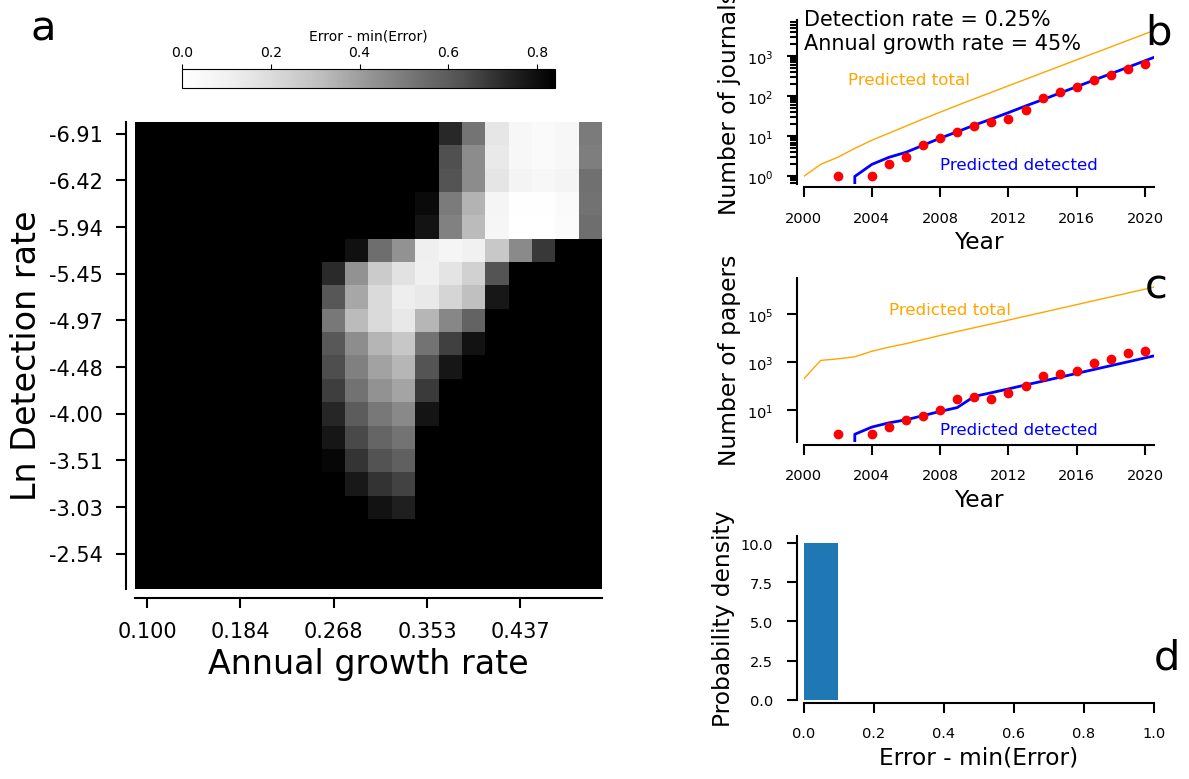

In [115]:
print(f"Maximum error found is {errors_matrix.max():.5f}")
print(f"Minimum error found is {errors_matrix.min():.5f}")

fig = plt.figure( figsize = (12, 8) )
gs = GridSpec( ncols = 3, nrows = 3, figure = fig, 
               width_ratios = [20, 0.01, 15] )


##########################################################################
# Parameter value scan
#
ax_hm =  fig.add_subplot(gs[:,0])
half_frame( ax_hm, 'Annual growth rate', 'Ln Detection rate', 
            font_size = my_fontsize )

ax_hm.set_xticks(range(0,len(g_rate_span[span]), 4))
ax_hm.set_xticklabels([f"{x:.3f}" for x in g_rate_span[span][::4]])

ax_hm.set_yticks(range(0,len(log_detection_rate_span[span]), 2))
ax_hm.set_yticklabels([f"{x:.2f}" for x in log_detection_rate_span[span][::2]])

im = ax_hm.imshow( errors_matrix-errors_matrix.min(), cmap = 'Greys', 
                   vmin = 0, vmax = 10*errors_matrix.min() )

plt.colorbar( im, ax = ax_hm, location = 'top', fraction = 0.1, 
              shrink = 0.8, label = 'Error - min(Error)',  )

ax_hm.text(-5, -4, 'a', fontsize = 2*my_fontsize)


##########################################################################
# Simulate dynamics for reasonable parameter values
#
detection_rate, g_rate, tau = -6, 0.45, 10

measured_errors = []

# Journals
#
ax_j = fig.add_subplot(gs[0,2])
half_frame(ax_j, 'Year', 'Number of journals', font_size = 0.7*my_fontsize )

ax_j.set_xticks(range(0,25,4))
ax_j.set_xticklabels(range(2000,2025,4)) 
ax_j.set_xlim(0, 20.5)

ax_j.semilogy(data_paper_mill_journals, 'ro', zorder = 10)

ax_j.text(2.6, 200, 'Predicted total', color = 'orange', 
            fontsize = 0.8*my_fontsize)
ax_j.text(8, 1.5, 'Predicted detected', color = 'b', 
            fontsize = 0.8*my_fontsize)
ax_j.text(20, 2000, 'b', fontsize = 2*my_fontsize)

parameters_str = ( f"Detection rate = {100*np.exp(detection_rate):.2f}%\n"
                   f"Annual growth rate = {100*g_rate:.0f}%\n" )
ax_j.text(0, 400, parameters_str, fontsize = 1.*my_fontsize)

# Papers
#
ax_p = fig.add_subplot(gs[1,2])
half_frame(ax_p, 'Year', 'Number of papers', font_size = 0.7*my_fontsize )

ax_p.set_xticks(range(0,25,4))
ax_p.set_xticklabels(range(2000,2025,4)) 
ax_p.set_xlim(0, 20.5)

ax_p.semilogy(data_paper_mill_papers, 'ro', zorder = 10)

ax_p.text(5, 100000, 'Predicted total', color = 'orange', 
            fontsize = 0.8*my_fontsize)
ax_p.text(8, 1, 'Predicted detected', color = 'b', 
            fontsize = 0.8*my_fontsize)
ax_p.text(20, 500000, 'c', fontsize = 2*my_fontsize)

# Run model with variable parameters and dynamics
#
for run in range(1):
    aux = dynamics( 22, data_paper_mill_papers, data_paper_mill_journals, 
                    detection_rate, g_rate, tau, variable_detection_rate, 
                    stochastic_detection, variable_creation, variable_gain,  ) 

    error, n_journals_detected, n_journals, n_papers_detected, n_papers  = aux
    measured_errors.append( error )
    
    ax_j.plot(n_journals, '-', color = 'orange', lw = 1, alpha = 1)
    ax_j.plot(n_journals_detected, 'b-', lw = 2, alpha = 1)

    ax_p.plot(n_papers_detected, 'b-', lw = 2, alpha = 1)
    ax_p.plot(n_papers, '-', color = 'orange', lw = 1, alpha = 1)

    
##########################################################################
# Distribution of errors for example parameters
#
ax_e = fig.add_subplot(gs[2,2])
half_frame(ax_e, 'Error - min(Error)', 'Probability density', font_size = 0.7*my_fontsize )

ax_e.hist(np.array(measured_errors) - errors_matrix.min(), density = True);
ax_e.text(1, 2, 'd', fontsize = 2*my_fontsize)
ax_e.set_xlim(0, 1)

##########################################################################
# Layout and save
#

plt.tight_layout()
plt.savefig(f"./FFFF_parameter_scan_{span}-tau_{tau}.png")

## Stochastic model

### Set parameter values and scan range

In [122]:
variable_gain = True
variable_detection_rate = True
stochastic_detection = True
variable_creation = True

log_detection_rate_span = {}
log_detection_rate_span['single'] = np.linspace( np.log(0.001), np.log(0.1), 
                                                 num = 20 )

g_rate_span = {}
g_rate_span['single'] = np.linspace( 0.1, 0.5, num = 20 )

span = 'single'

N_runs = 30
tau = 10
flag = ''

# Change string based on sequence of Falses and Trues above
run_type = 'TTTT'

### Simulations

This cell will take some time to run, especially if `N_runs` and/or `num` are large.

In [123]:
errors_matrix = np.zeros( ( len(log_detection_rate_span[span]), 
                            len(g_rate_span[span]) ) ) 

for i, detection_rate in enumerate(log_detection_rate_span[span]):
    print(f"{i:>2} -- {detection_rate:.5f}")
    for j, g_rate in enumerate(g_rate_span[span]):
        summed_errors = 0
        
        for run in range(N_runs):
            summed_errors += dynamics( 22, data_paper_mill_papers, 
                                        data_paper_mill_journals, 
                                        detection_rate, g_rate, tau, 
                                        variable_detection_rate, 
                                        stochastic_detection, 
                                        variable_creation, 
                                        variable_gain, )[0]  
            
            
        errors_matrix[i, j] = summed_errors / N_runs

        
print(f"Maximum error found is {errors_matrix.max():.5f}")
print(f"Minimum error found is {errors_matrix.min():.5f}")

 0 -- -6.90776
 1 -- -6.66538
 2 -- -6.42300
 3 -- -6.18062
 4 -- -5.93825
 5 -- -5.69587
 6 -- -5.45349
 7 -- -5.21111
 8 -- -4.96874
 9 -- -4.72636
10 -- -4.48398
11 -- -4.24160
12 -- -3.99923
13 -- -3.75685
14 -- -3.51447
15 -- -3.27209
16 -- -3.02972
17 -- -2.78734
18 -- -2.54496
19 -- -2.30259
Maximum error found is 13.46570
Minimum error found is 0.23778


### Plot dynamics

Maximum error found is 13.46570
Minimum error found is 0.23778


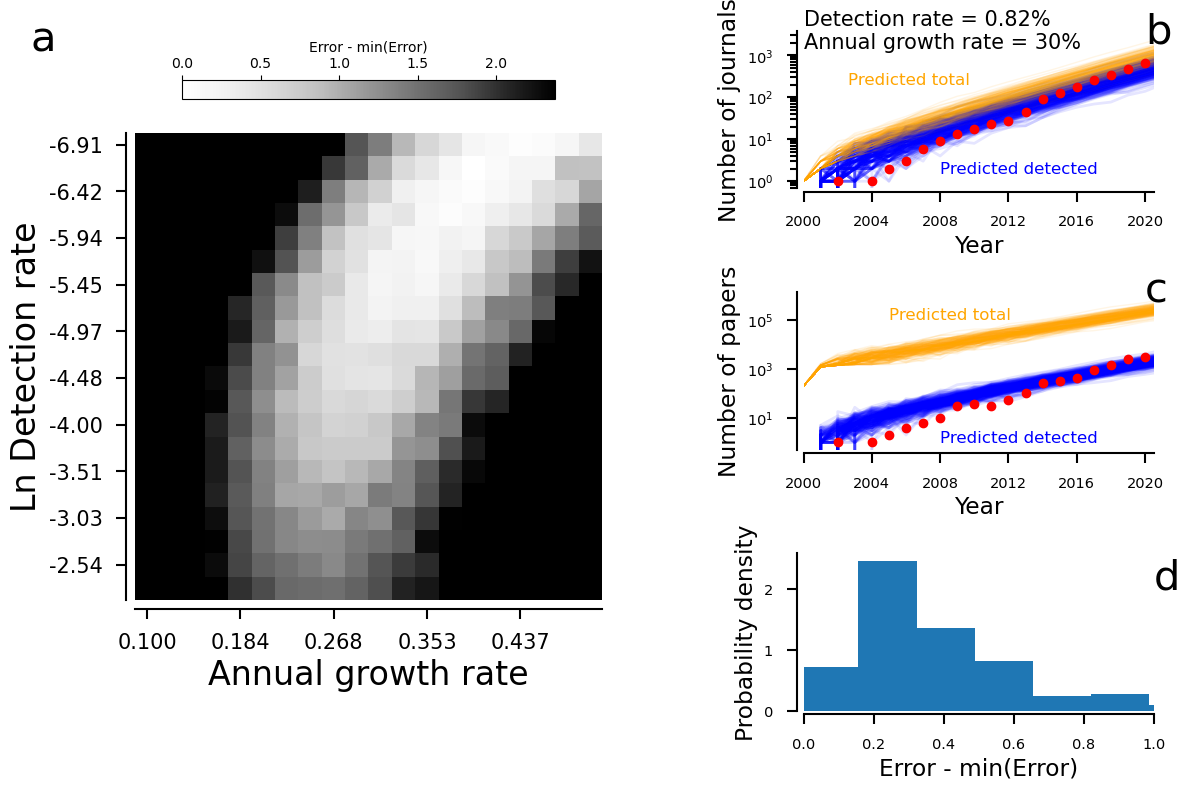

In [124]:
print(f"Maximum error found is {errors_matrix.max():.5f}")
print(f"Minimum error found is {errors_matrix.min():.5f}")

fig = plt.figure( figsize = (12, 8) )
gs = GridSpec( ncols = 3, nrows = 3, figure = fig, 
               width_ratios = [20, 0.01, 15] )


##########################################################################
# Parameter value scan
#
ax_hm =  fig.add_subplot(gs[:,0])
half_frame( ax_hm, 'Annual growth rate', 'Ln Detection rate', 
            font_size = my_fontsize )

ax_hm.set_xticks(range(0,len(g_rate_span[span]), 4))
ax_hm.set_xticklabels([f"{x:.3f}" for x in g_rate_span[span][::4]])

ax_hm.set_yticks(range(0,len(log_detection_rate_span[span]), 2))
ax_hm.set_yticklabels([f"{x:.2f}" for x in log_detection_rate_span[span][::2]])

im = ax_hm.imshow( errors_matrix-errors_matrix.min(), cmap = 'Greys', 
                   vmin = 0, vmax = 10*errors_matrix.min() )

plt.colorbar( im, ax = ax_hm, location = 'top', fraction = 0.1, 
              shrink = 0.8, label = 'Error - min(Error)',  )

ax_hm.text(-5, -4, 'a', fontsize = 2*my_fontsize)


##########################################################################
# Simulate dynamics for reasonable parameter values
#
detection_rate, g_rate, tau = -4.8, 0.30, 10

measured_errors = []

# Journals
#
ax_j = fig.add_subplot(gs[0,2])
half_frame(ax_j, 'Year', 'Number of journals', font_size = 0.7*my_fontsize )

ax_j.set_xticks(range(0,25,4))
ax_j.set_xticklabels(range(2000,2025,4)) 
ax_j.set_xlim(0, 20.5)

ax_j.semilogy(data_paper_mill_journals, 'ro', zorder = 10)

ax_j.text(2.6, 200, 'Predicted total', color = 'orange', 
            fontsize = 0.8*my_fontsize)
ax_j.text(8, 1.5, 'Predicted detected', color = 'b', 
            fontsize = 0.8*my_fontsize)
ax_j.text(20, 2000, 'b', fontsize = 2*my_fontsize)

parameters_str = ( f"Detection rate = {100*np.exp(detection_rate):.2f}%\n"
                   f"Annual growth rate = {100*g_rate:.0f}%\n" )
ax_j.text(0, 400, parameters_str, fontsize = 1.*my_fontsize)

# Papers
#
ax_p = fig.add_subplot(gs[1,2])
half_frame(ax_p, 'Year', 'Number of papers', font_size = 0.7*my_fontsize )

ax_p.set_xticks(range(0,25,4))
ax_p.set_xticklabels(range(2000,2025,4)) 
ax_p.set_xlim(0, 20.5)

ax_p.semilogy(data_paper_mill_papers, 'ro', zorder = 10)

ax_p.text(5, 100000, 'Predicted total', color = 'orange', 
            fontsize = 0.8*my_fontsize)
ax_p.text(8, 1, 'Predicted detected', color = 'b', 
            fontsize = 0.8*my_fontsize)
ax_p.text(20, 500000, 'c', fontsize = 2*my_fontsize)

# Run model with variable parameters and dynamics
#
for run in range(200):
    aux = dynamics( 22, data_paper_mill_papers, data_paper_mill_journals, 
                    detection_rate, g_rate, tau, variable_detection_rate, 
                    stochastic_detection, variable_creation, variable_gain,  ) 

    error, n_journals_detected, n_journals, n_papers_detected, n_papers  = aux
    measured_errors.append( error )
    
    ax_j.plot(n_journals, '-', color = 'orange', lw = 1, alpha = .1)
    ax_j.plot(n_journals_detected, 'b-', lw = 2, alpha = .1)

    ax_p.plot(n_papers_detected, 'b-', lw = 2, alpha = .1)
    ax_p.plot(n_papers, '-', color = 'orange', lw = 1, alpha = .1)

    
##########################################################################
# Distribution of errors for example parameters
#
ax_e = fig.add_subplot(gs[2,2])
half_frame( ax_e, 'Error - min(Error)', 'Probability density', 
            font_size = 0.7*my_fontsize )

ax_e.hist(np.array(measured_errors) - errors_matrix.min(), density = True);
ax_e.text(1, 2, 'd', fontsize = 2*my_fontsize)
ax_e.set_xlim(0, 1)

##########################################################################
# Layout and save
#

plt.tight_layout()
plt.savefig(f"./{run_type}_parameter_scan_{span}-tau_{tau}.png")